In [141]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.io import loadmat

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format='retina'
label_size = 22 + 2
tick_size = 20 + 2
title_size = 24 + 2
legend_size = 18

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "Palatino"

In [142]:
def plot(P: np.ndarray, annot: np.ndarray, m: int, dataset: str, is_amt: bool = False):
    off_diag_mask = np.eye(*P.shape, dtype=bool)
    vmin = P.min()
    vmax = P.max()

    ticklabels = []

    fontsize = 32 if dataset == 'dogs3' else 15

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    sns.heatmap(
        P,
        annot=annot,
        mask=~off_diag_mask,
        cmap="Blues",
        vmin=vmin,
        vmax=vmax,
        cbar=False,
        ax=ax,
        xticklabels=ticklabels,
        yticklabels=ticklabels,
        fmt="",
        annot_kws={"fontsize": fontsize, "weight": "bold"},
    )
    sns.heatmap(
        P,
        annot=annot,
        mask=off_diag_mask,
        cmap="OrRd",
        vmin=vmin,
        vmax=vmax,
        cbar_kws=dict(ticks=[]),
        cbar=False,
        ax=ax,
        xticklabels=ticklabels,
        yticklabels=ticklabels,
        fmt="",
        annot_kws={"fontsize": fontsize, "weight": "bold"},
    )
    if is_amt:
        fig.savefig(
            f"plots/P_{m}_{dataset}_drag-and-drop.pdf", bbox_inches="tight", dpi=150
        )
    else:
        fig.savefig(f"plots/P_{m}_{dataset}_from_P_E.pdf", bbox_inches="tight", dpi=150)

In [143]:
def bounds(n, dataset, delta=0.05):
    if dataset == 'dogs3':
        delta_prime = delta / 6
    else:
        delta_prime = delta / 21
    # return np.sqrt(0.5 * n * np.log(2 / delta))
    return np.sqrt(np.log(2 / delta_prime) / (2 * n))

In [144]:
df = pd.read_pickle("data/pm_from_pe.pkl")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.lineplot(df, x='num_images_per_query', y='edge_error_rate', style='dataset', markers=True, hue='dataset', errorbar='sd', legend=True,  err_style='bars', ax=ax)
ax.set_xticks([2, 3, 4, 5, 6, 7, 8])
ax.set_xlabel(r'no. images per query ($m$)', fontsize=label_size)
ax.set_ylabel(r'edge error rate', fontsize=label_size)
ax.tick_params(axis='both', which='major', labelsize=tick_size)
ax.legend(fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"./plots/pm_from_pe_edge_error_rate.png", dpi=300,
            facecolor='white', transparent=False)
plt.close(fig)

In [145]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.lineplot(df, x='num_images_per_query', y='vi', style='dataset', markers=True, hue='dataset', errorbar='sd', legend=True, err_style='bars', ax=ax)
ax.set_xticks([2, 3, 4, 5, 6, 7, 8])
ax.set_xlabel(r'no. images per query ($m$)', fontsize=label_size)
ax.set_ylabel(r'$\mathrm{VI}$', fontsize=label_size)
ax.tick_params(axis='both', which='major', labelsize=tick_size)
ax.legend(fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"./plots/pm_from_pe_VI.png", dpi=300,
            facecolor='white', transparent=False)
plt.close(fig)

In [146]:
delta = 0.05

In [147]:
avg_edge_density_matrices = {}
num_observed_matrices = {}
for dataset in ["dogs3", "birds5"]:
    for m in range(2, 9):
        edge_density_matrices = df[
            (df.num_images_per_query == m) & (df.dataset == dataset)
        ].edge_density
        observed_matrices = df[
            (df.num_images_per_query == m) & (df.dataset == dataset)
        ].edge_observe
        avg_edge_density_matrix = np.average(
            edge_density_matrices, axis=0, weights=observed_matrices
        )
        avg_edge_density_matrices[(dataset, m)] = avg_edge_density_matrix
        num_observed_matrices[(dataset, m)] = observed_matrices.sum(axis=0)

/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_75671/3278062021.py:126: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_75671/3278062021.py:126: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_75671/3278062021.py:126: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_75671/3278062021.py:126: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_75671/3278062021.py:126: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_75671/3278062021.py:126: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel

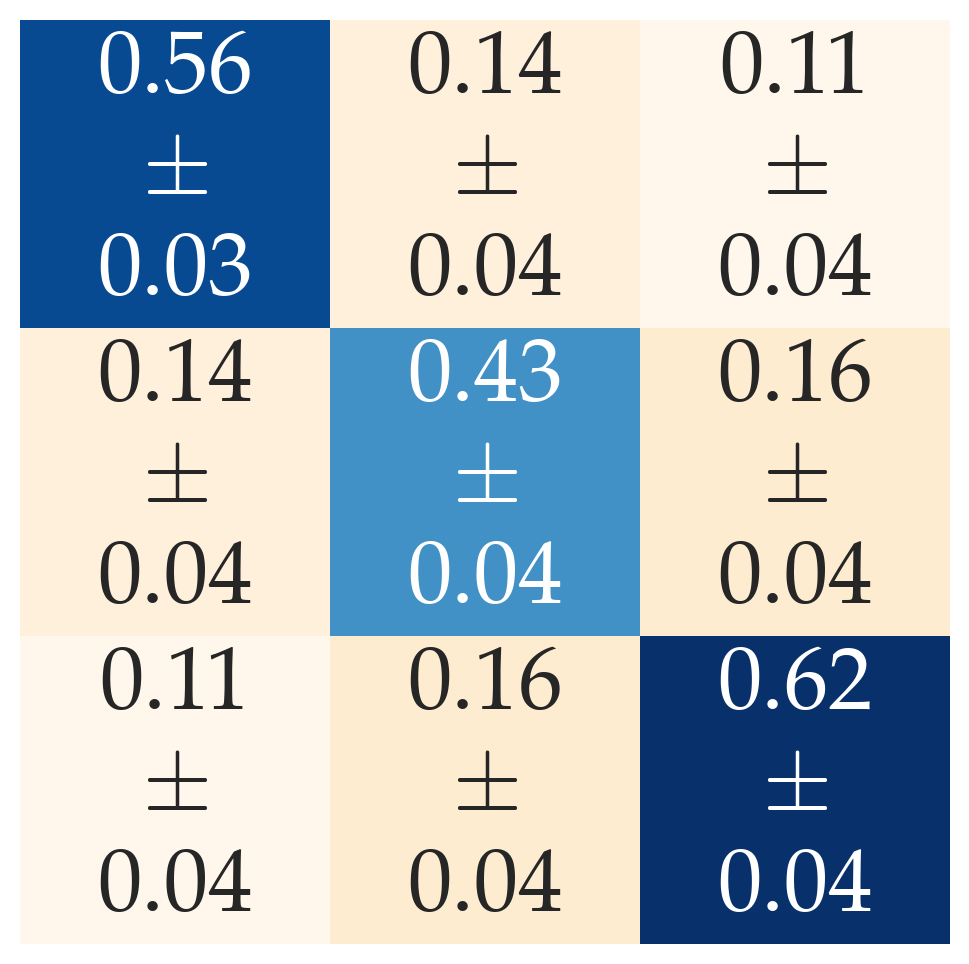

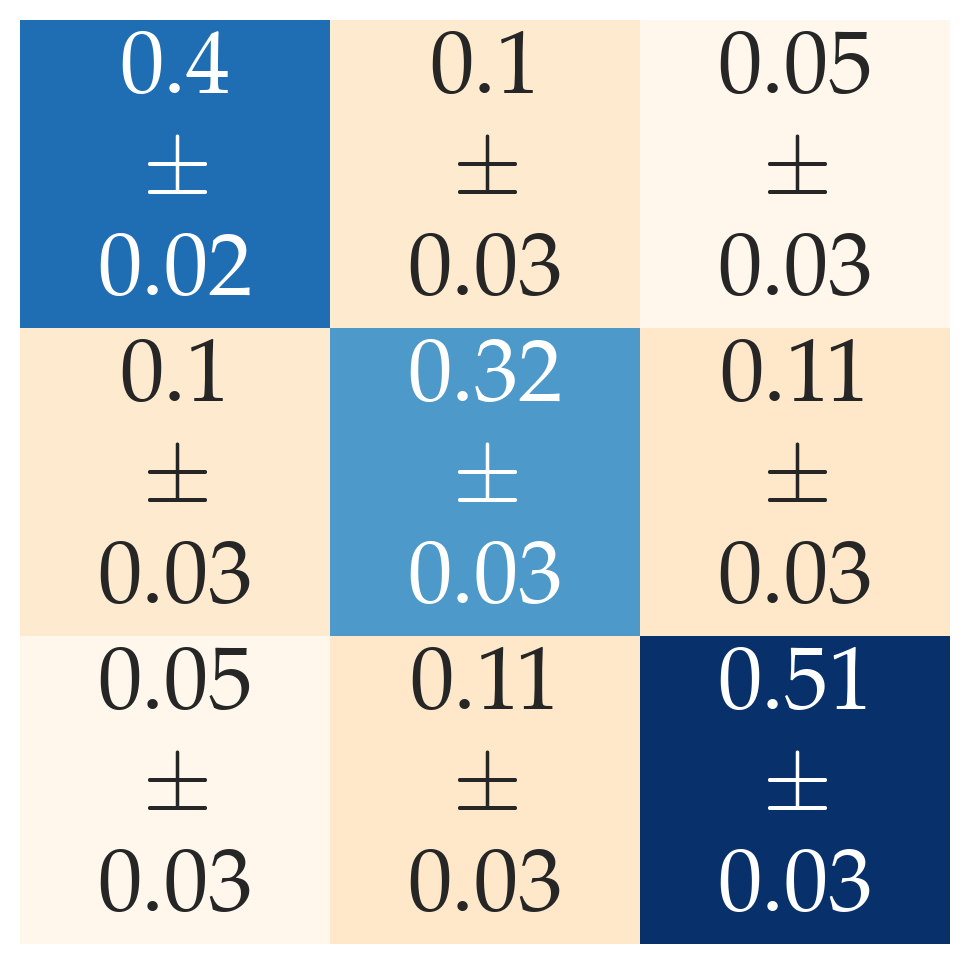

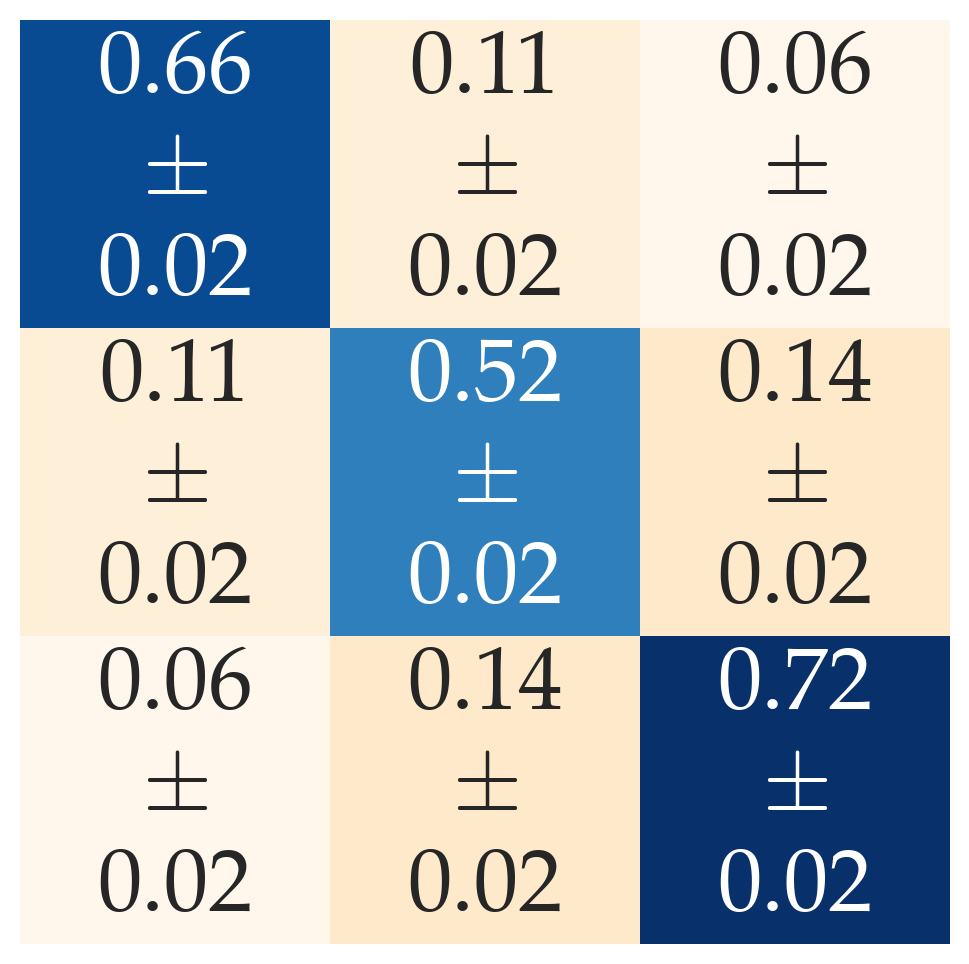

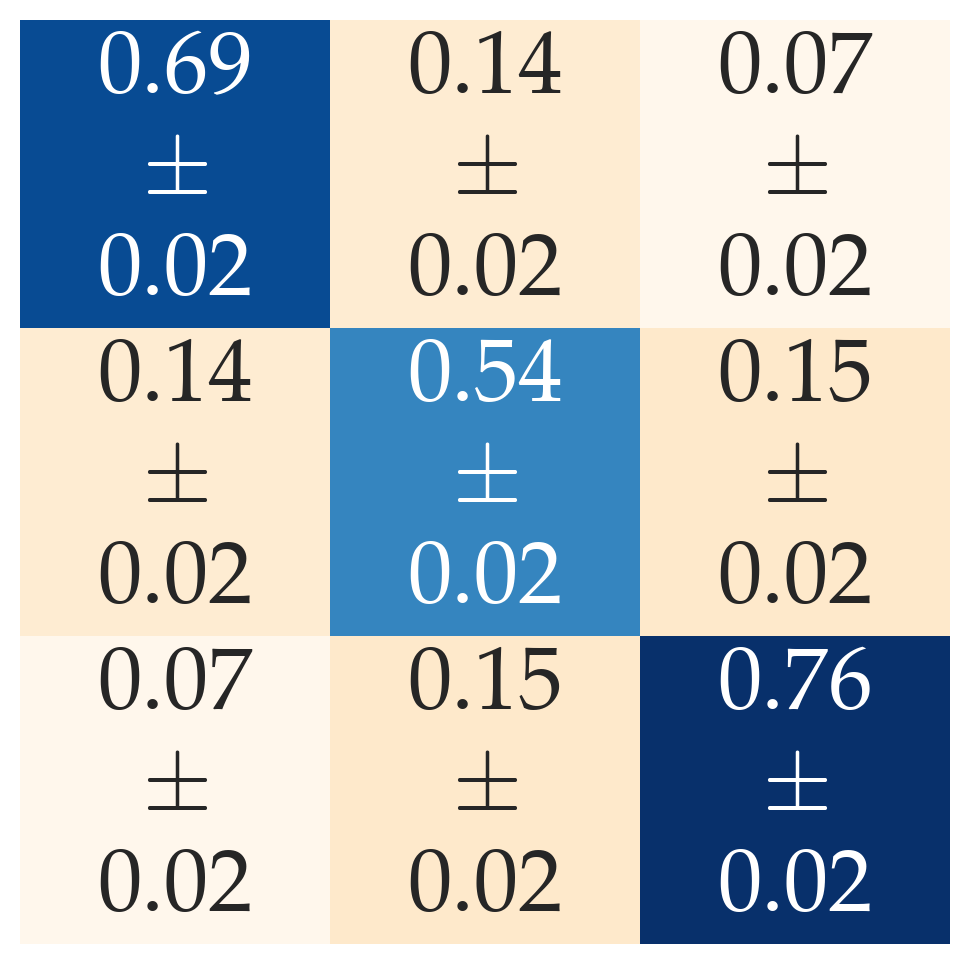

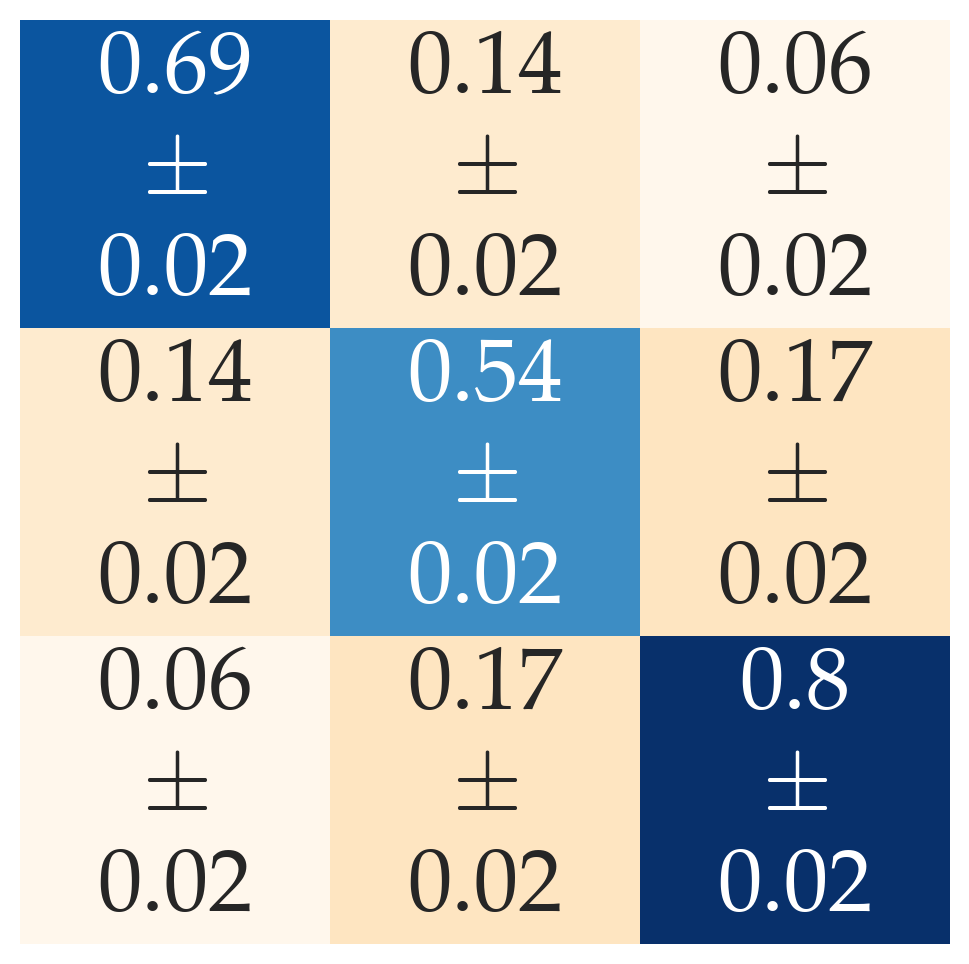

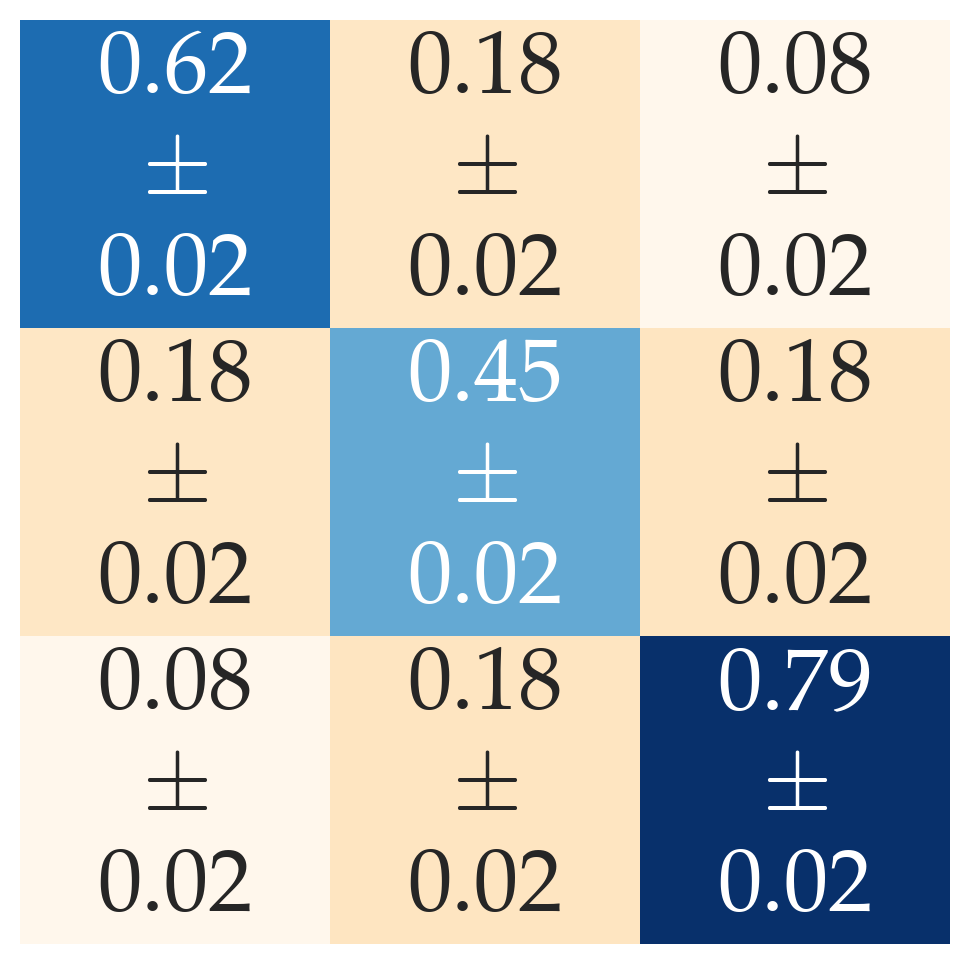

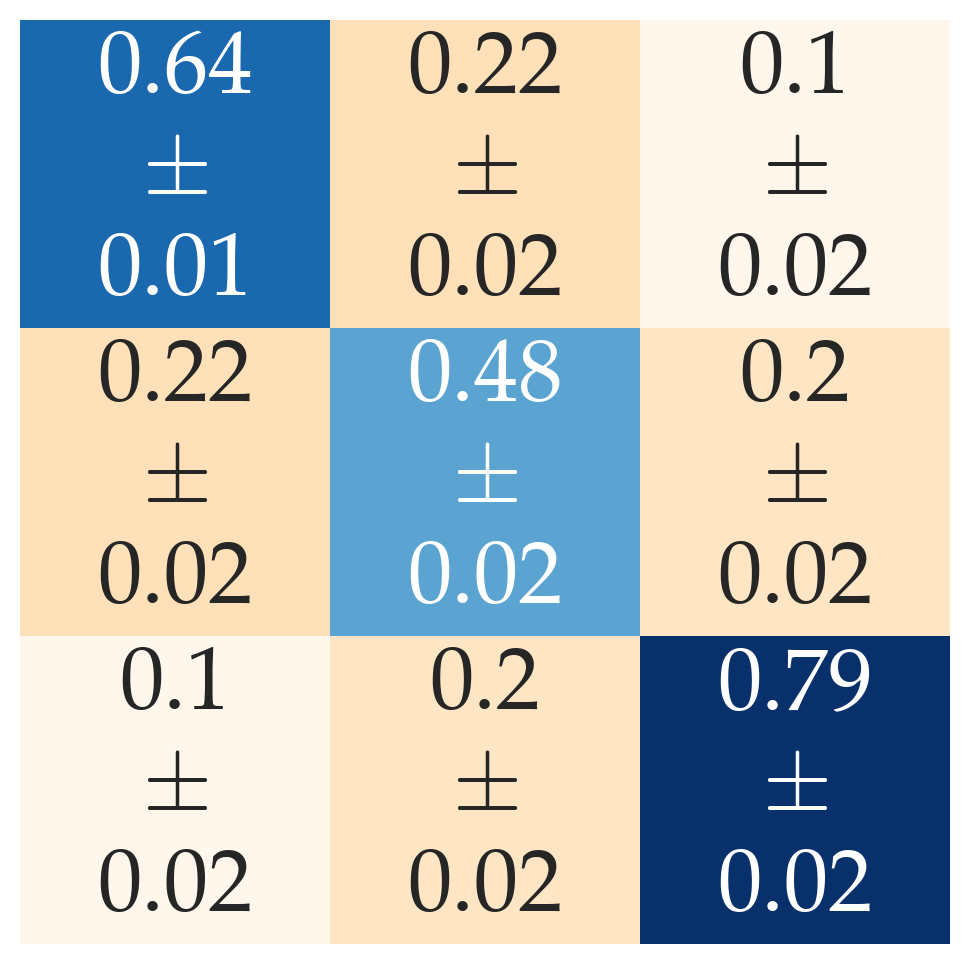

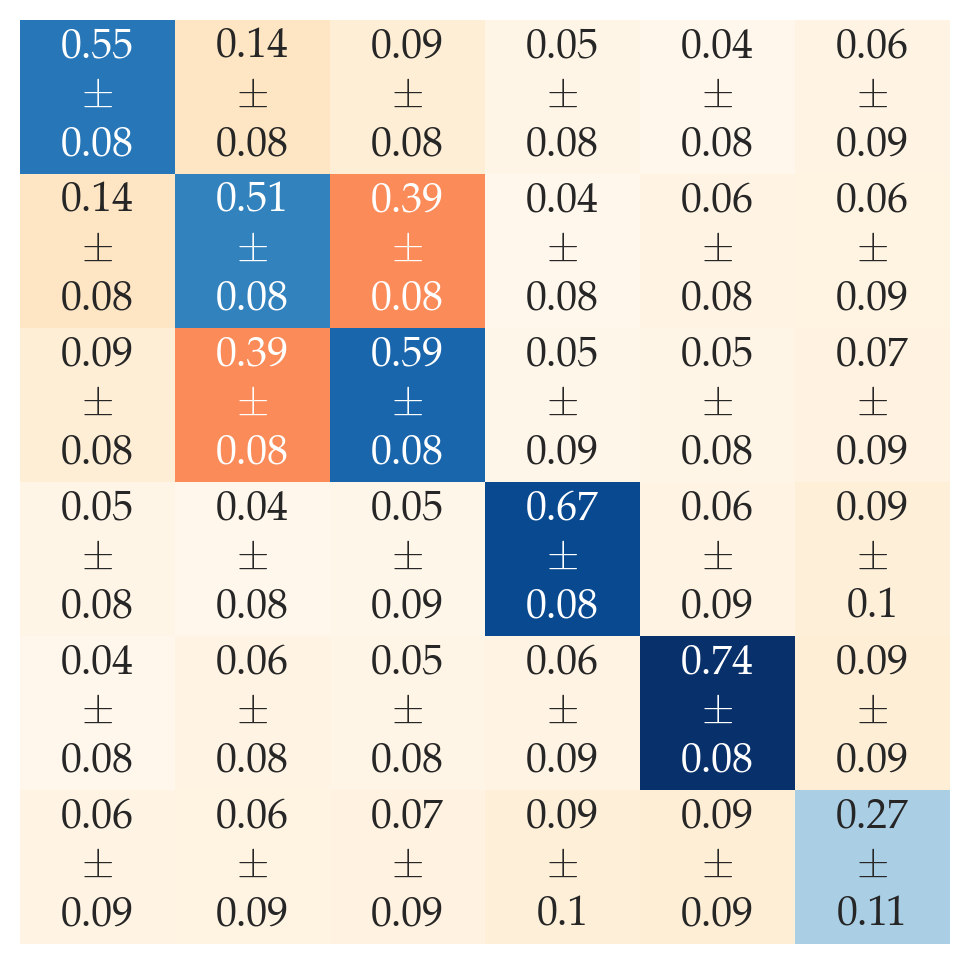

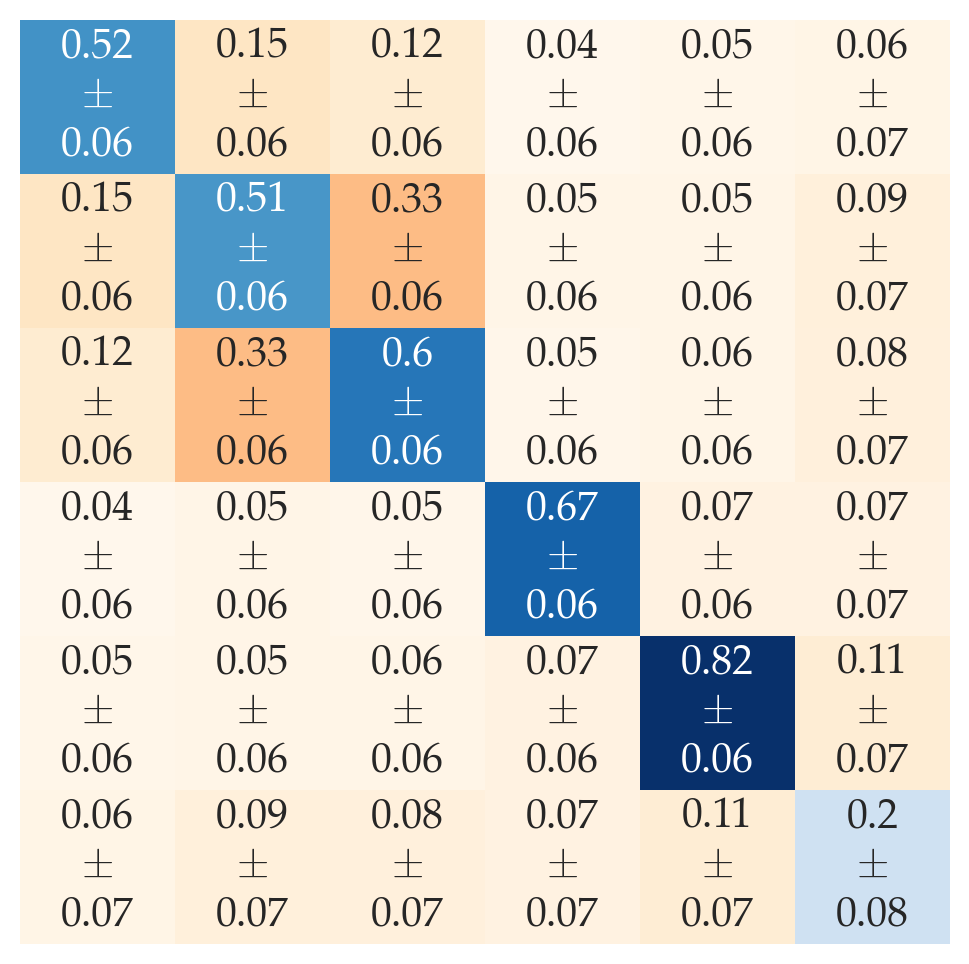

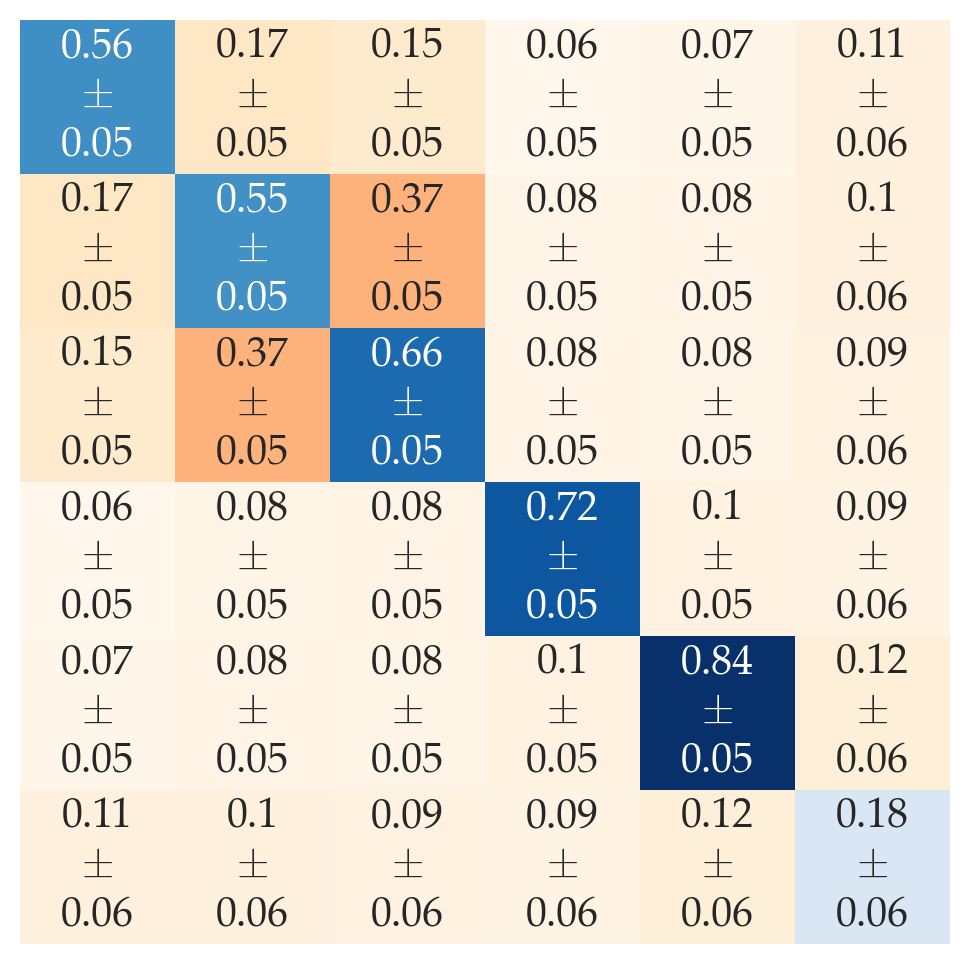

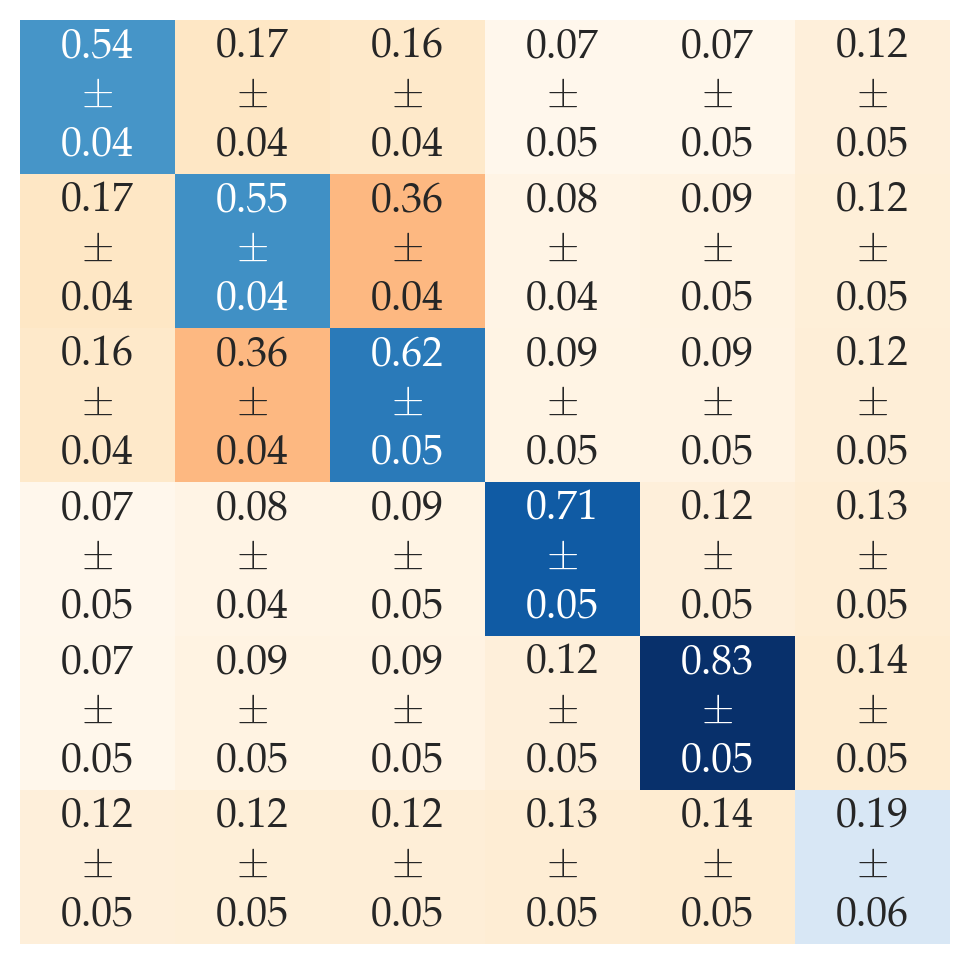

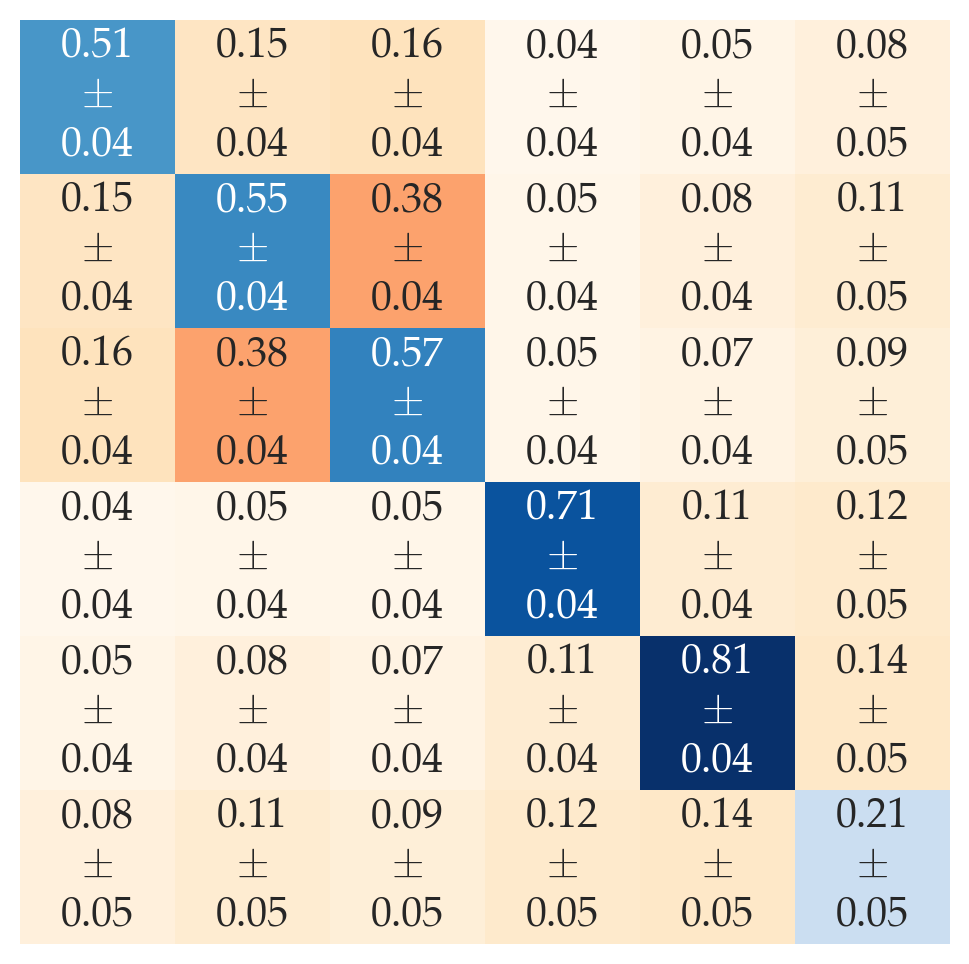

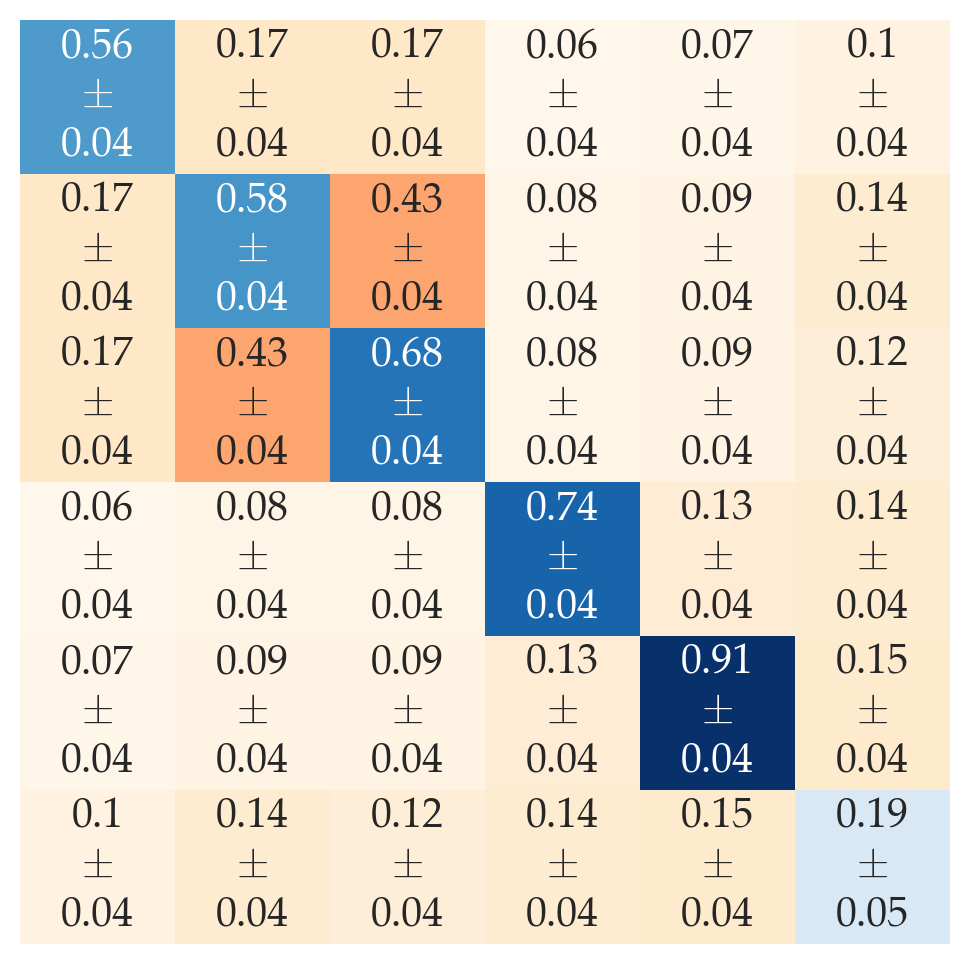

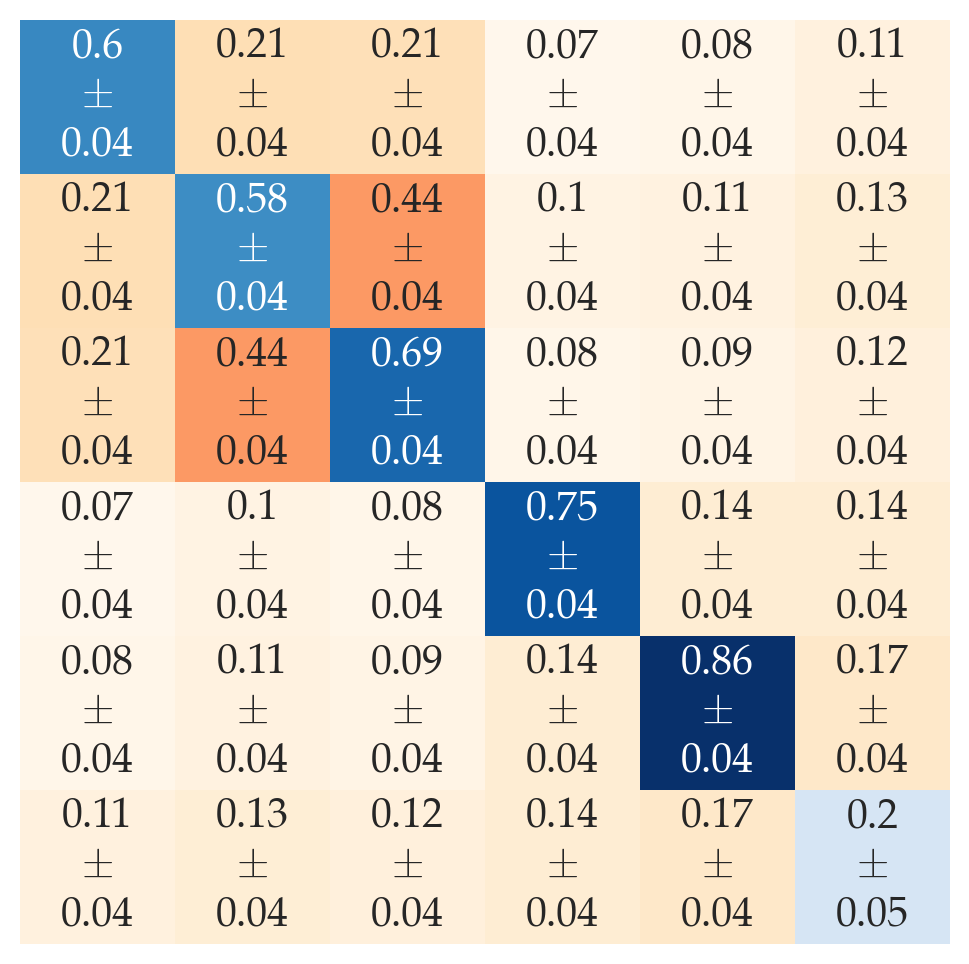

In [148]:
mismatch_df = defaultdict(list)
for dataset in ["dogs3", "birds5"]:
    # print("=" * 10, dataset, "=" * 10)
    K = 3 if dataset == "dogs3" else 6
    num_columns = 6 if dataset == "dogs3" else 21

    # print(r'\begin{table}[]')
    # print(r'\begin{tabular}{@{}' + 'l' * (num_columns + 1)  + r'@{}}')
    # print(r'\toprule')
    # print(r'\multicolumn{1}{c}{} & ', end='')
    # k = 0
    # for i in range(K):
    #     for j in range(K):
    #         if i > j:
    #             continue
    #         print(rf'\multicolumn{{2}}{{c}}{{({i}, {j})}} & ', end='')
    #         k += 1
    # print(r'\\ \midrule')
    # print(k)
    # print('m & ', end='')
    # k = 0
    # for i in range(num_columns):
    #     k += 1
    #     if i % 2 == 0:
    #         print(r'AMT & ', end='')
    #     else:
    #         print(r'SIM & ', end='')
    # print(r'\\ \midrule\midrule')
    # print(k)

    

    for m in range(2, 9):
        # fig, axes = plt.subplots(K, K, figsize=(K * 2, K * 2))
        sim_P = avg_edge_density_matrices[(dataset, m)]
        sim_observed = num_observed_matrices[(dataset, m)]
        amt_P = np.load(f"data/{m}-{dataset}-edge_density.npy")
        amt_observed = np.load(f"data/{m}-{dataset}-edge_observe.npy")
        mismatch_count = 0
        # print(f"{m} &", end=" ")
        amt_bounds = np.zeros((K, K), dtype=object)
        sim_bounds = np.zeros((K, K), dtype=object)
        for i in range(K):
            for j in range(K):
                sim_bound = bounds(sim_observed[i, j], delta=delta, dataset=dataset)
                amt_bound = bounds(amt_observed[i, j], delta=delta, dataset=dataset)
                amt_bounds[i, j] = str(round(amt_P[i, j], 2)) + '\n' + r'$\pm$' + '\n' + str(round(amt_bound, 2))
                sim_bounds[i, j] = str(round(sim_P[i, j], 2)) + '\n' + r'$\pm$' + '\n' + str(round(sim_bound, 2))
                continue
                if i > j:
                    axes[i, j].axis("off")
                    continue
                # print(
                #     rf"\begin{{tabular}}[c]{{@{{}}l@{{}}}} {amt_P[i, j]:.3f} \\ $\pm$ \\ {amt_bound:.3f} \end{{tabular}}", end=" & "
                # )
                # print(
                #     rf"\begin{{tabular}}[c]{{@{{}}l@{{}}}} {sim_P[i, j]:.3f} \\ $\pm$ \\ {sim_bound:.3f} \end{{tabular}}", end=" & " if i < K - 1 or j < K - 1 else " \\\\ \\midrule"
                # )
                avg_edge_density_matrices
                axes[i, j].errorbar(
                    x=-0.5,
                    y=amt_P[i, j],
                    yerr=amt_bound,
                    label="amt",
                    elinewidth=15,
                    capsize=20,
                    capthick=10,
                    zorder=2,
                )
                axes[i, j].errorbar(
                    x=1.5,
                    y=sim_P[i, j],
                    yerr=sim_bound,
                    label="sim",
                    elinewidth=15,
                    capsize=20,
                    capthick=10,
                    zorder=2,
                )
                axes[i, j].scatter(
                    x=-0.5, y=amt_P[i, j], marker="o", color="black", s=150, zorder=3
                )
                axes[i, j].scatter(
                    x=1.5, y=sim_P[i, j], marker="o", color="black", s=150, zorder=3
                )

                axes[i, j].tick_params(axis="y", direction="in", pad=-22)
                axes[i, j].tick_params(axis="x", direction="in", pad=-15)
                axes[i, j].set_yticks(
                    [
                        amt_P[i, j] + amt_bound,
                        sim_P[i, j] + sim_bound,
                        amt_P[i, j] - amt_bound,
                        sim_P[i, j] - sim_bound,
                    ]
                )
                axes[i, j].set_yticklabels(
                    [
                        ""
                        for s in [
                            amt_P[i, j] + amt_bound,
                            sim_P[i, j] + sim_bound,
                            amt_P[i, j] - amt_bound,
                            sim_P[i, j] - sim_bound,
                        ]
                    ]
                )
                axes[i, j].set_xlim([-2, 3])
                axes[i, j].set_xticks([])
                # axes[i, j].set_xticks([0, 1])
                # axes[i, j].set_xticklabels(["AMT", "SIM"])

                if (
                    amt_P[i, j] - amt_bound > sim_P[i, j] + sim_bound
                    or amt_P[i, j] + amt_bound < sim_P[i, j] - sim_bound
                ):
                    mismatch_count += 1
        # print()

        mismatch_df["mismatch_count"].append(
            mismatch_count / 6 if dataset == "dogs3" else mismatch_count / 21
        )
        mismatch_df["dataset"].append(dataset)
        mismatch_df["m"].append(m)

        fig.tight_layout()
        fig.savefig(
            "plots/confidence_bound_comparison_{}_{}.png".format(m, dataset),
            bbox_inches="tight",
            dpi=150,
        )
    # print(r'\bottomrule')
    # print(r'\end{tabular}')
    # print(r'\end{table}')
        # plot(sim_P, sim_bounds, m, dataset, is_amt=False)
        plot(amt_P, amt_bounds, m, dataset, is_amt=True)
mismatch_df = pd.DataFrame(mismatch_df)

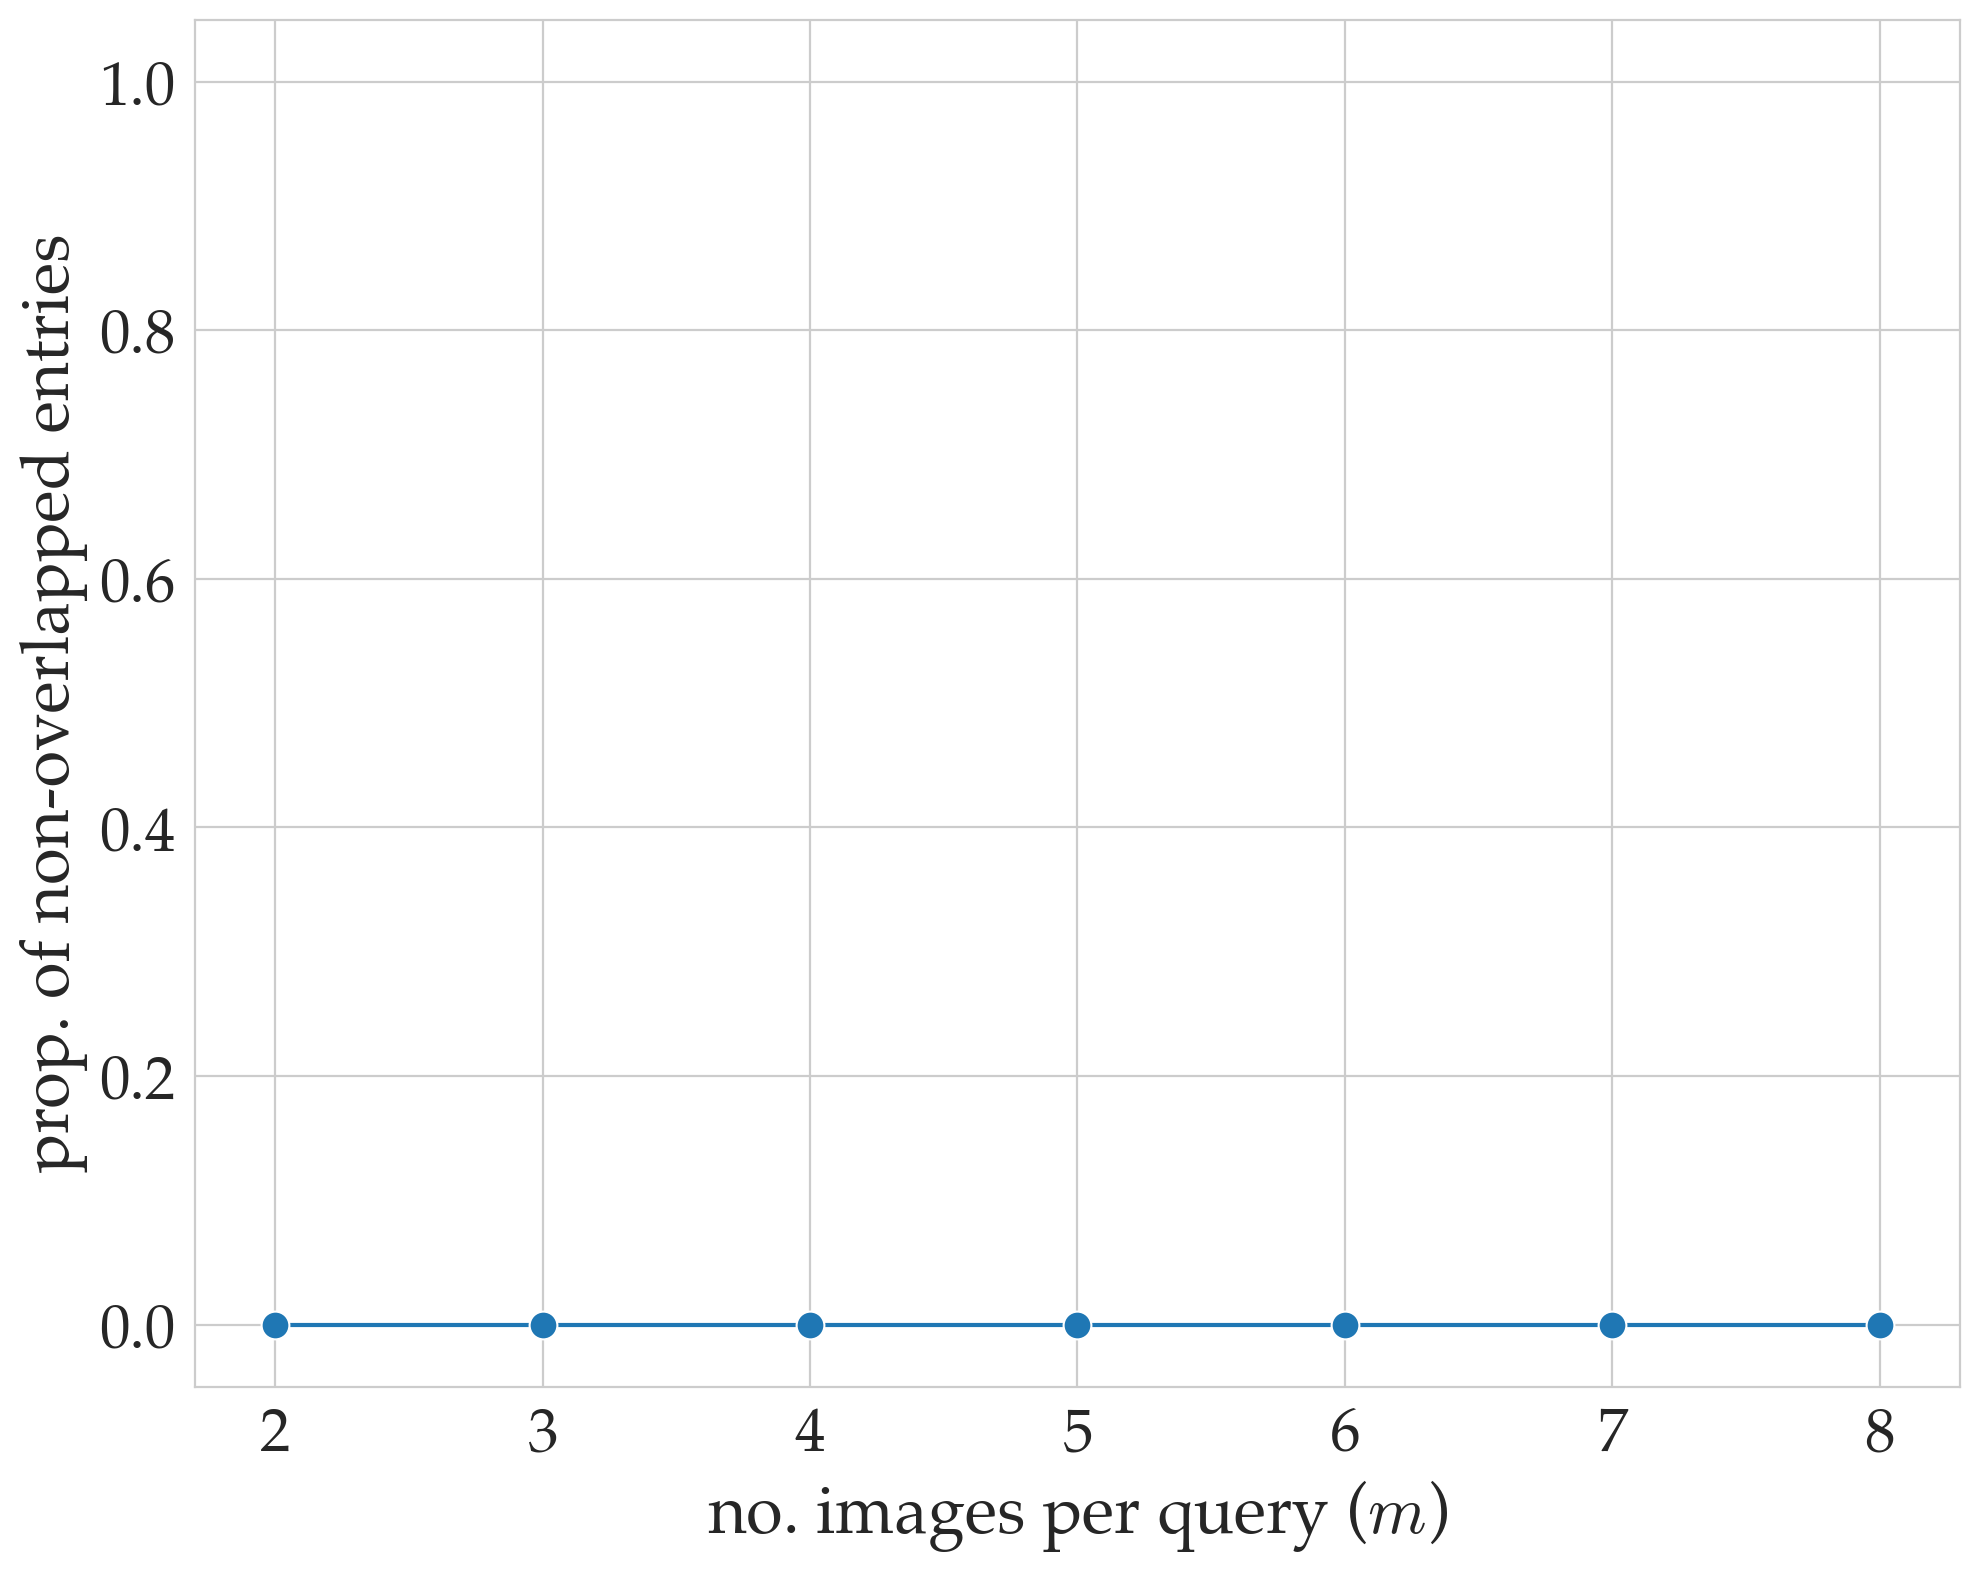

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.lineplot(
    mismatch_df[mismatch_df.dataset == "dogs3"],
    x="m",
    y="mismatch_count",
    marker='o',
    markersize=10
)
ax.set_xlabel(r'no. images per query ($m$)', fontsize=label_size)
ax.set_ylabel(r'prop. of non-overlapped entries', fontsize=label_size)
ax.set_xticks([2, 3, 4, 5, 6, 7, 8])
ax.set_ylim([-0.05, 1.05])
ax.tick_params(axis='both', which='major', labelsize=tick_size)
plt.tight_layout()
plt.savefig('plots/confidence_bound_comparison_mismatch_count_dogs3.png', bbox_inches='tight', dpi=150)

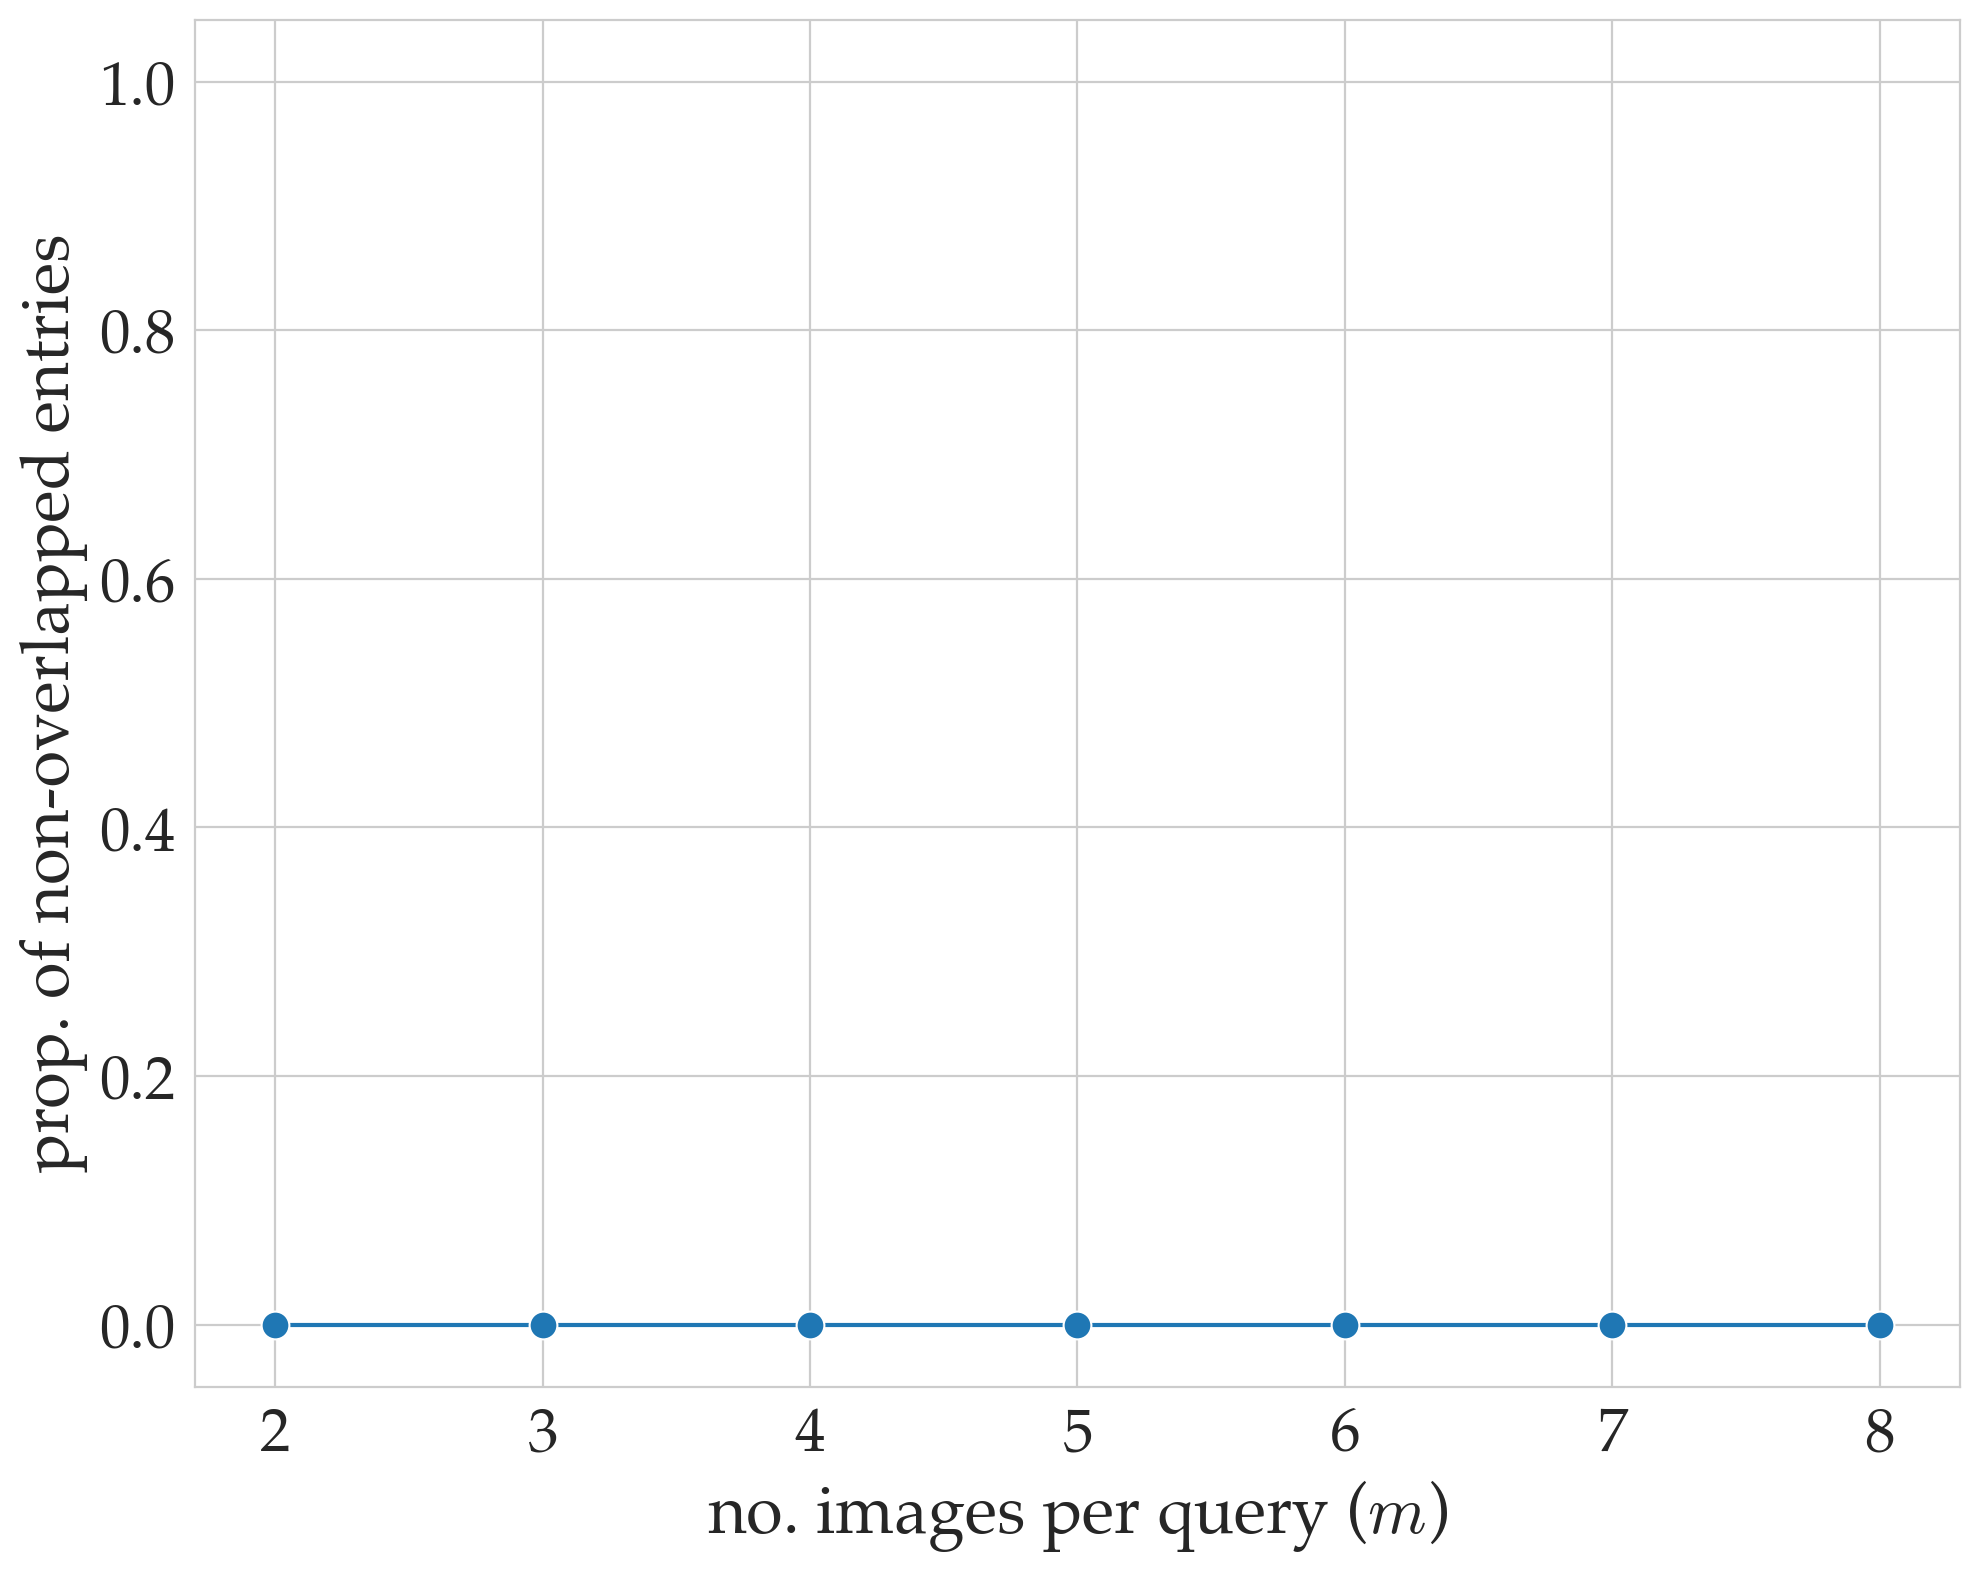

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.lineplot(
    mismatch_df[mismatch_df.dataset == "birds5"],
    x="m",
    y="mismatch_count",
    marker='o',
    markersize=10
)
ax.set_xlabel(r'no. images per query ($m$)', fontsize=label_size)
ax.set_ylabel(r'prop. of non-overlapped entries', fontsize=label_size)
ax.set_xticks([2, 3, 4, 5, 6, 7, 8])
ax.set_ylim([-0.05, 1.05])
ax.tick_params(axis='both', which='major', labelsize=tick_size)
plt.tight_layout()
plt.savefig('plots/confidence_bound_comparison_mismatch_count_birds5.png', bbox_inches='tight', dpi=150)